<a href="https://colab.research.google.com/github/itinasharma/MachineLearning/blob/main/Naive_Bayes'_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Naive Bayes Classification: Automating Gender**

Prediction

🌟 Overview

In this notebook, we explored Naive Bayes Classification to predict gender (Male/Female) using the following features:
**Height (in feet) 📏Weight (in lbs) ⚖️
Foot Size (in inches) 👣 **




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# Define the data
# Sex (class) | Height (feet) | Weight (lbs) | Foot size (inches)
male_data = {
    'height': np.array([6, 5.92, 5.58, 5.92]),
    'weight': np.array([180, 190, 170, 165]),
    'footsize': np.array([12, 11, 12, 10])
}
female_data = {
    'height': np.array([5, 5.5, 5.42, 5.75]),
    'weight': np.array([100, 150, 130, 150]),
    'footsize': np.array([6, 8, 7, 9])
}

📘 **Step 1: Data Overview and Mean/Variance Calculations**

Before predicting, we calculated the mean and variance for each feature (Height, Weight, Foot Size) for both Male and Female classes. These statistics are essential to build the probability density functions (PDFs) for our Naive Bayes model.

🧮 **Mean and Variance for Male and Female Classes
In this step, we calculated the mean and variance for:**

*Height 📏
Weight ⚖️
Foot Size 👣*

We calculated the mean by summing the observations and dividing by the number of data points. For variance, we calculated it as the average of the squared deviations from the mean.



In [ ]:
# Function to calculate mean and variance
def calculate_mean(data):
    return np.mean(data)

def calculate_variance(data):
    return np.var(data, ddof=1)  # ddof=1 ensures sample variance calculation

In [ ]:
# Calculate mean and variance for each attribute

# For Males
mean_male_height = calculate_mean(male_data['height'])
mean_male_weight = calculate_mean(male_data['weight'])
mean_male_footsize = calculate_mean(male_data['footsize'])

var_male_height = calculate_variance(male_data['height'])
var_male_weight = calculate_variance(male_data['weight'])
var_male_footsize = calculate_variance(male_data['footsize'])

In [ ]:
# For Females
mean_female_height = calculate_mean(female_data['height'])
mean_female_weight = calculate_mean(female_data['weight'])
mean_female_footsize = calculate_mean(female_data['footsize'])

var_female_height = calculate_variance(female_data['height'])
var_female_weight = calculate_variance(female_data['weight'])
var_female_footsize = calculate_variance(female_data['footsize'])

In [ ]:
# Print means and variances
print(f"Mean Male Height: {mean_male_height}")
print(f"Variance Male Height: {var_male_height}")
print(f"Mean Female Height: {mean_female_height}")
print(f"Variance Female Height: {var_female_height}")
print(f"Mean Male Weight: {mean_male_weight}")
print(f"Variance Male Weight: {var_male_weight}")
print(f"Mean Female Weight: {mean_female_weight}")
print(f"Variance Female Weight: {var_female_weight}")
print(f"Mean Male Footsize: {mean_male_footsize}")
print(f"Variance Male Footsize: {var_male_footsize}")
print(f"Mean Female Footsize: {mean_female_footsize}")
print(f"Variance Female Footsize: {var_female_footsize}")

Mean Male Height: 5.855
Variance Male Height: 0.03503333333333331
Mean Female Height: 5.4175
Variance Female Height: 0.097225
Mean Male Weight: 176.25
Variance Male Weight: 122.91666666666667
Mean Female Weight: 132.5
Variance Female Weight: 558.3333333333334
Mean Male Footsize: 11.25
Variance Male Footsize: 0.9166666666666666
Mean Female Footsize: 7.5
Variance Female Footsize: 1.6666666666666667


✅ **Why We Did This:**

These statistics form the foundation for the probabilistic calculations in the Naive Bayes classifier.

We use these means and variances to calculate the probability density functions (PDF) for each feature.

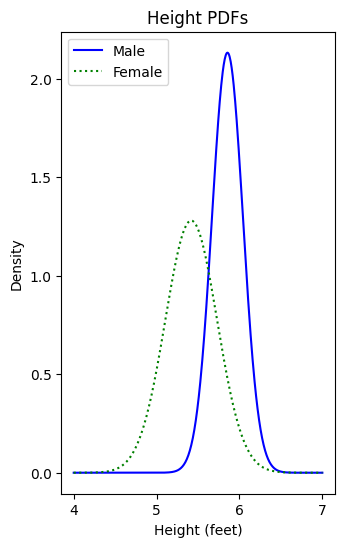

In [ ]:
# Plot and visualize PDFs for Height, Weight, and Footsize

# Plot Height PDFs
plt.figure(figsize=(12, 6))

# Height
plt.subplot(1, 3, 1)
x_height = np.linspace(4, 7, 500)
pdf_male_height = norm.pdf(x_height, loc=mean_male_height, scale=np.sqrt(var_male_height))
pdf_female_height = norm.pdf(x_height, loc=mean_female_height, scale=np.sqrt(var_female_height))

plt.plot(x_height, pdf_male_height, label=f'Male', color='b')
plt.plot(x_height, pdf_female_height, label=f'Female', color='g', linestyle='dotted')
plt.title("Height PDFs")
plt.xlabel('Height (feet)')
plt.ylabel('Density')
plt.legend()

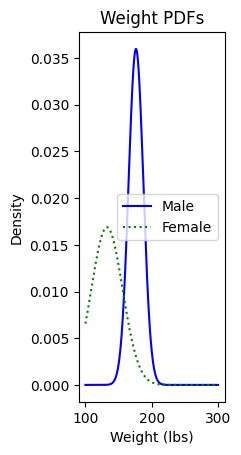

In [ ]:
# Plot Weight PDFs
plt.subplot(1, 3, 2)
x_weight = np.linspace(100, 300, 500)
pdf_male_weight = norm.pdf(x_weight, loc=mean_male_weight, scale=np.sqrt(var_male_weight))
pdf_female_weight = norm.pdf(x_weight, loc=mean_female_weight, scale=np.sqrt(var_female_weight))

plt.plot(x_weight, pdf_male_weight, label=f'Male', color='b')
plt.plot(x_weight, pdf_female_weight, label=f'Female', color='g', linestyle='dotted')
plt.title("Weight PDFs")
plt.xlabel('Weight (lbs)')
plt.ylabel('Density')
plt.legend()

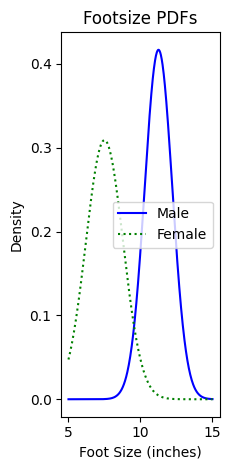

In [ ]:
# Plot Footsize PDFs
plt.subplot(1, 3, 3)
x_footsize = np.linspace(5, 15, 500)
pdf_male_footsize = norm.pdf(x_footsize, loc=mean_male_footsize, scale=np.sqrt(var_male_footsize))
pdf_female_footsize = norm.pdf(x_footsize, loc=mean_female_footsize, scale=np.sqrt(var_female_footsize))

plt.plot(x_footsize, pdf_male_footsize, label=f'Male', color='b')
plt.plot(x_footsize, pdf_female_footsize, label=f'Female', color='g', linestyle='dotted')
plt.title("Footsize PDFs")
plt.xlabel('Foot Size (inches)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

📊 Let's analyze each parameter separately:

Height

Males: Mean Height = 5.855 feet
Females: Mean Height = 5.4175 feet
The difference is about 0.4375 feet, which is notable.
However, height distributions for males and females still overlap significantly since height variability is relatively large for individuals.

Weight

Males: Mean Weight = 176.25 lbs
Females: Mean Weight = 132.5 lbs
The mean difference in weight (around 43 lbs) is quite substantial.
Still, body compositions vary greatly, and there's a significant internal variance. This overlap could make weight-based classification tricky.

Foot Size

Males: Mean Foot Size = 11.25 inches
Females: Mean Foot Size = 7.5 inches
This shows an extreme difference in means and small overlap.
Foot size has a much clearer separation between males and females compared to height or weight. In other words, the variance is lower and the distinctions are stronger.



✅ Conclusion
While Height and Weight can be used for distinguishing males and females, they tend to overlap more.
Foot Size offers stronger mean differences and lower variability, making it a better distinguishing feature for gender classification.
Hence, foot size provides more reliable insights in this dataset for differentiating males and females with greater confidence.

Testing Sample
Sex (class)  Height (feet)  Weight (lbs)  Foot size (inches)

?                6                130             8

---



In [30]:
# Testing sample
test_sample = {"Height": 6, "Weight": 200, "FootSize": 11}


 **Calculating the Probability Density Function (PDF)** 🔢

In [31]:
# Function to calculate PDF
def calculate_probability(x, mean, variance):
    exponent = math.exp(-((x - mean) ** 2) / (2 * variance))
    return (1 / math.sqrt(2 * math.pi * variance)) * exponent


In [32]:
# Function to calculate the overall probability for a class
def calculate_class_probability(test_sample, class_params):
    probabilities = []
    for feature, value in test_sample.items():
        mean, variance = class_params[feature]
        prob = calculate_probability(value, mean, variance)
        probabilities.append(prob)
    return math.prod(probabilities)  # Multiply all feature probabilities

**Define the Prior Probabilities** 📝

These represent the prior belief about the class probabilities:

In [33]:
prior_male = prior_female = 0.5
params = {
    "Male": {
        "Height": (mean_male_height, var_male_height),
        "Weight": (mean_male_weight, var_male_weight),
        "FootSize": (mean_male_footsize, var_male_footsize)
    },
    "Female": {
        "Height": (mean_female_height, var_female_height),
        "Weight": (mean_female_weight, var_female_weight),
        "FootSize": (mean_female_footsize, var_female_footsize)
    }
}

In [34]:
# Function to calculate the overall probability for a class
def calculate_class_probability(test_sample, class_params):
    probabilities = []
    for feature, value in test_sample.items():
        mean, variance = class_params[feature]
        prob = calculate_probability(value, mean, variance)
        probabilities.append(prob)
    return math.prod(probabilities)  # Multiply all feature probabilities

# Calculate probabilities for Male and Female
prob_male = calculate_class_probability(test_sample, params["Male"]) * prior_male
prob_female = calculate_class_probability(test_sample, params["Female"]) * prior_female

**Combine with Priors and Compare Probabilities** 🔍

In [35]:
# Determine the prediction
if prob_male > prob_female:
    prediction = "Male"
else:
    prediction = "Female"

# Print results
print(f"Probability Male: {prob_male}")
print(f"Probability Female: {prob_female}")
print(f"Prediction: {prediction}")

Probability Male: 0.0011532900001485276
Probability Female: 2.49784431117523e-07
Prediction: Male
